In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
upload = files.upload()
data = pd.read_excel("churndata.xlsx")
data.head()

Saving churndata.xlsx to churndata.xlsx


,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

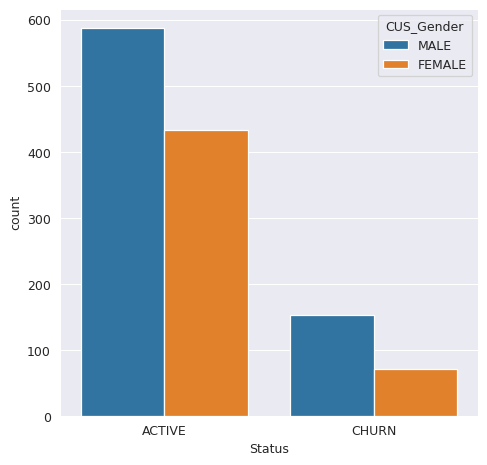

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,6), dpi=90)
sns.countplot(data=data, x="Status", hue="CUS_Gender")
plt.show()

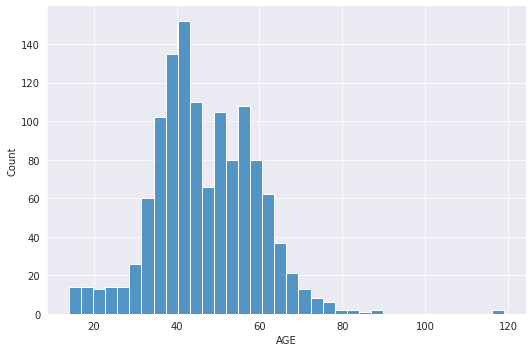

In [ ]:
# plt.figure(figsize=(6,6),dpi=90)
sns.displot(data["AGE"], aspect=1.5)
plt.show()

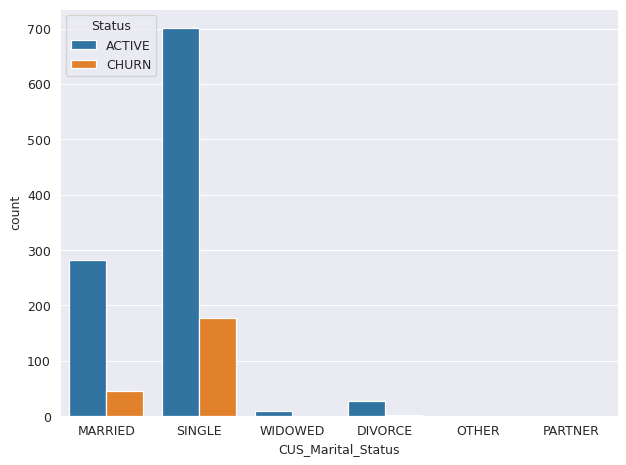

In [ ]:
plt.figure(figsize=(8,6), dpi=90)
sns.countplot(data=data, x="CUS_Marital_Status", hue="Status")
plt.show()

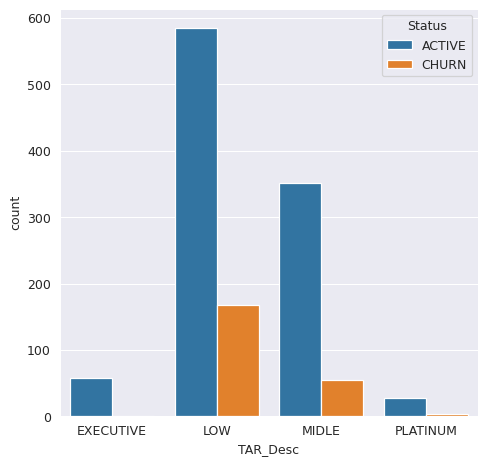

In [ ]:
plt.figure(figsize=(6,6), dpi=90)
sns.countplot(data=data, x="TAR_Desc", hue="Status")
plt.show()

In [ ]:
# function for trans_Debit_Credit
def hist(arr):
  for i in arr:
    sns.displot(data[i], aspect=1.5)
    plt.show()

In [ ]:
trans_debit = ['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3']
total_debit = ['total debit amount for S1','total debit amount for S2', 'total debit amount for S3']
trans_credit = ['# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3']
total_credit = ['total credit amount for S1','total credit amount for S2', 'total credit amount for S3']

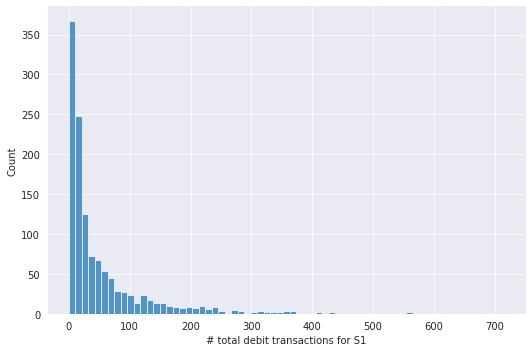

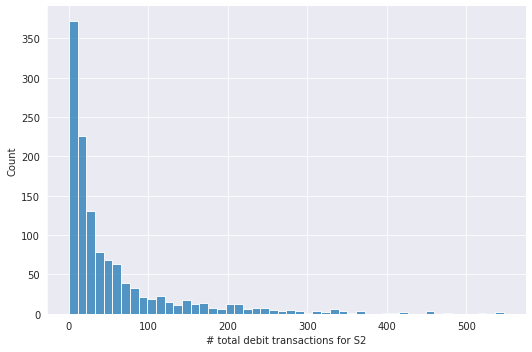

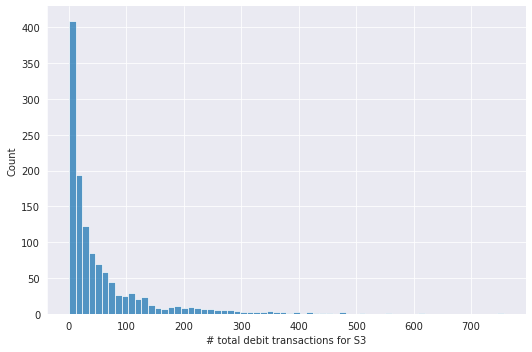

In [ ]:
#transaction debit for S1/2/3
hist(trans_debit)

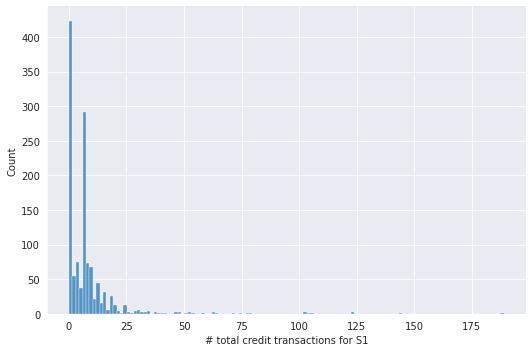

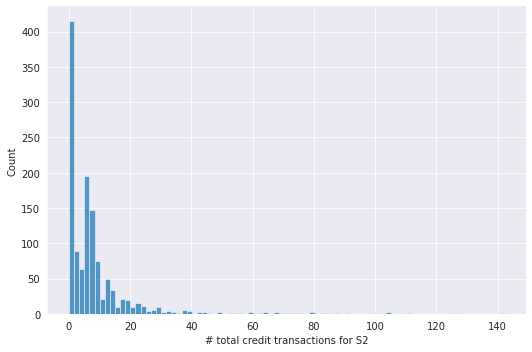

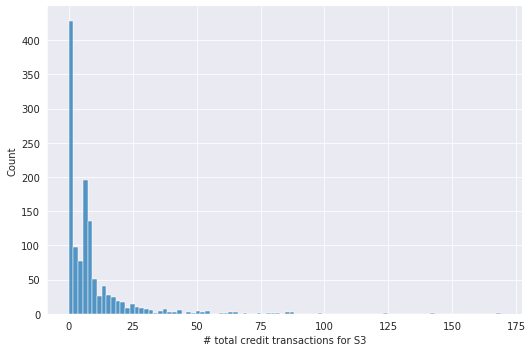

In [ ]:
hist(trans_credit)

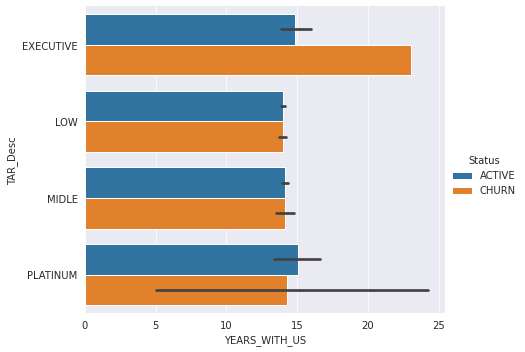

In [ ]:
sns.catplot(data=data, x="YEARS_WITH_US", y="TAR_Desc", aspect=1.3, kind="bar", hue="Status")
plt.show()

In [ ]:
# converted the DOB to datetime format and set the customers year
data["CUS_birth_year"] = pd.to_datetime(data["CUS_DOB"]).dt.year

In [ ]:
data["CUS_birth_year"].max()

2005

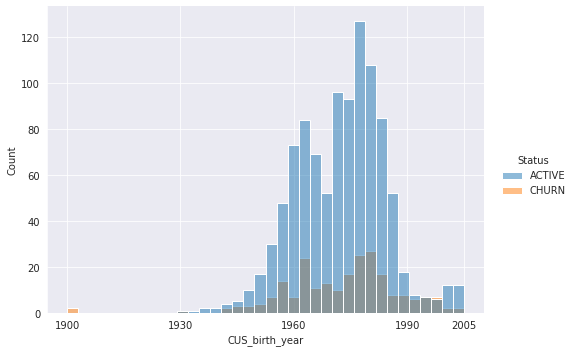

In [ ]:
# plt.figure(figsize=(12,6), dpi=90
sns.displot(data=data, x="CUS_birth_year", hue="Status", aspect=1.4)
plt.xticks([1900, 1930, 1960, 1990, 2005])
plt.show()

In [ ]:
print(f"no duplicates: {data.duplicated().sum()}")

no duplicates: 0


In [ ]:
data.dropna(inplace=True)

In [ ]:
print(data.isnull().sum())

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [ ]:
remove1 = ["CIF","CUS_DOB","CUS_Customer_Since","# total debit transactions for S1","# total debit transactions for S2","# total debit transactions for S3",
          "total debit amount for S1","total debit amount for S2","total debit amount for S3","total credit amount for S1","total credit amount for S2",
          "total credit amount for S3","# total credit transactions for S1","# total credit transactions for S2","# total credit transactions for S3","total transactions"]
data.drop(remove1, axis=1, inplace=True)
data.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,CUS_birth_year
0,49,7116.64,MALE,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,ACTIVE,1970
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,ACTIVE,1973
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDLE,ACTIVE,1966
3,15,500.00,FEMALE,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,ACTIVE,2004
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,ACTIVE,1971


In [ ]:
print(data["CUS_Gender"].unique())
print(data["Status"].unique())

['MALE' 'FEMALE']
['ACTIVE' 'CHURN']


In [ ]:
data["Status"].value_counts() # quite imbalanced data

ACTIVE    1015
CHURN      223
Name: Status, dtype: int64

In [ ]:
# preparing our target variable
data["Status"] = data["Status"].replace({"ACTIVE": 0, "CHURN": 1})

In [ ]:
# male = 1, female = 0
data["CUS_Gender"] = data["CUS_Gender"].replace({"MALE": 1, "FEMALE":0})

In [ ]:
data["TAR_Desc"].unique()

array(['EXECUTIVE', 'LOW', 'MIDLE', 'PLATINUM'], dtype=object)

In [ ]:
#correcting the spelling
data["TAR_Desc"] = data["TAR_Desc"].replace("MIDLE", "MIDDLE")

# dealing with imbalance data

In [ ]:
data.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,CUS_birth_year
0,49,7116.64,1,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,0,1970
1,46,1500000.00,0,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,0,1973
2,53,5000000.00,0,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDDLE,0,1966
3,15,500.00,0,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,0,2004
4,48,9000000.00,0,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,0,1971


In [ ]:
data["Status"].value_counts()

0    1015
1     223
Name: Status, dtype: int64

In [ ]:
# Upsampling using resample class
from sklearn.utils import resample

#separating the class
df_major = data[data["Status"]==0]
df_minor = data[data["Status"]==1]

df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=1015,    # to match majority class
                                 random_state=20) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_major, df_minor_upsampled], axis=0)

In [ ]:
print(f"orginal: {data.Status.value_counts()}")
print(f"\nafter upsample: {df_upsampled.Status.value_counts()}")

orginal: 0    1015
1     223
Name: Status, dtype: int64

after upsample: 0    1015
1    1015
Name: Status, dtype: int64


In [ ]:
df_upsampled.Status.value_counts()

0    1015
1    1015
Name: Status, dtype: int64

In [ ]:
df_upsampled.to_csv("upsampled_churn.csv")
files.download("upsampled_churn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_dummies(arr):
  dum_data = pd.DataFrame()
  for col in arr:
    temp = None
    temp = pd.get_dummies(data[col])
    dum_data = pd.concat([dum_data, temp], axis=1)
  return dum_data

In [ ]:
dum = ["CUS_Marital_Status","TAR_Desc"]
dum_df = get_dummies(dum)

In [ ]:
print(dum_df.shape)
print(data.shape)

(1238, 10)
(1238, 13)


In [ ]:
data = pd.concat([dum_df, data], axis=1)
data.drop(["CUS_Marital_Status","TAR_Desc", "OTHER"], axis=1, inplace=True)
data.head()

,DIVORCE,MARRIED,PARTNER,SINGLE,WIDOWED,EXECUTIVE,LOW,MIDDLE,PLATINUM,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,Status,CUS_birth_year
0,0,1,0,0,0,1,0,0,0,49,7116.64,1,25,4758311.63,887,5659653.33,65,2231,ACTIVE,1970
1,0,0,0,1,0,0,1,0,0,46,1500000.00,0,14,139363.22,97,87000.00,10,2223,ACTIVE,1973
2,0,0,0,1,0,0,0,1,0,53,5000000.00,0,14,37375.46,53,1020883.70,27,2222,ACTIVE,1966
3,0,0,0,1,0,0,1,0,0,15,500.00,0,14,4000.00,1,76946.96,12,2223,ACTIVE,2004
4,0,0,0,1,0,0,1,0,0,48,9000000.00,0,5,338470.29,60,442100.00,21,2223,ACTIVE,1971


In [ ]:
data.head()

,DIVORCE,MARRIED,PARTNER,SINGLE,WIDOWED,EXECUTIVE,LOW,MIDDLE,PLATINUM,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,Status,CUS_birth_year
0,0,1,0,0,0,1,0,0,0,49,7116.64,1,25,4758311.63,887,5659653.33,65,2231,0,1970
1,0,0,0,1,0,0,1,0,0,46,1500000.00,0,14,139363.22,97,87000.00,10,2223,0,1973
2,0,0,0,1,0,0,0,1,0,53,5000000.00,0,14,37375.46,53,1020883.70,27,2222,0,1966
3,0,0,0,1,0,0,1,0,0,15,500.00,0,14,4000.00,1,76946.96,12,2223,0,2004
4,0,0,0,1,0,0,1,0,0,48,9000000.00,0,5,338470.29,60,442100.00,21,2223,0,1971


In [ ]:
data.shape

(1238, 20)

In [ ]:
# separating my x and y variables
x = data.drop("Status", axis=1).values
y = data.iloc[:,-2].values

In [ ]:
x

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 6.500e+01, 2.231e+03,
        1.970e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 2.223e+03,
        1.973e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.700e+01, 2.222e+03,
        1.966e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.170e+02, 2.232e+03,
        1.985e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.800e+01, 2.222e+03,
        1.950e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.700e+01, 2.222e+03,
        1.961e+03]])

In [ ]:
# splitting before scaling the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2, stratify=y)

# look at their shape
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(990, 19)
(248, 19)
(990,)
(248,)


In [ ]:
data.drop("Status", axis=1)

,DIVORCE,MARRIED,PARTNER,SINGLE,WIDOWED,EXECUTIVE,LOW,MIDDLE,PLATINUM,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,CUS_birth_year
0,0,1,0,0,0,1,0,0,0,49,7116.64,1,25,4758311.63,887,5659653.33,65,2231,1970
1,0,0,0,1,0,0,1,0,0,46,1500000.00,0,14,139363.22,97,87000.00,10,2223,1973
2,0,0,0,1,0,0,0,1,0,53,5000000.00,0,14,37375.46,53,1020883.70,27,2222,1966
3,0,0,0,1,0,0,1,0,0,15,500.00,0,14,4000.00,1,76946.96,12,2223,2004
4,0,0,0,1,0,0,1,0,0,48,9000000.00,0,5,338470.29,60,442100.00,21,2223,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0,0,0,1,0,0,1,0,0,68,4500.00,1,14,5645.60,26,0.00,0,2223,1951
1245,0,0,0,1,0,0,0,1,0,35,3500000.00,1,14,385735.90,127,674630.41,22,2222,1984
1246,0,0,0,1,0,0,0,1,0,34,1000.00,1,14,2473621.68,1207,2641348.01,217,2232,1985
1247,0,0,0,1,0,0,0,1,0,69,2000000.00,1,14,1371852.22,583,1310768.35,48,2222,1950


In [ ]:
# looking for numeric data array
x_train[:,[9,10,12,13,14,15,16,17,18]]

array([[4.100e+01, 7.500e+06, 1.400e+01, ..., 2.200e+01, 2.222e+03,
        1.978e+03],
       [4.400e+01, 9.070e+02, 1.300e+01, ..., 6.000e+01, 2.222e+03,
        1.975e+03],
       [4.600e+01, 2.000e+06, 1.400e+01, ..., 2.000e+00, 2.223e+03,
        1.973e+03],
       ...,
       [3.100e+01, 3.500e+06, 1.400e+01, ..., 0.000e+00, 2.223e+03,
        1.988e+03],
       [3.700e+01, 2.500e+06, 1.400e+01, ..., 2.500e+01, 2.222e+03,
        1.982e+03],
       [4.100e+01, 5.000e+05, 1.300e+01, ..., 5.000e+00, 2.223e+03,
        1.978e+03]])

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[:, [9,10,12,13,14,15,16,17,18]] = scaler.fit_transform(x_train[:, [9,10,12,13,14,15,16,17,18]])
x_test[:, [9,10,12,13,14,15,16,17,18]] = scaler.transform(x_test[:, [9,10,12,13,14,15,16,17,18]])

In [ ]:
# converting all the data into float32
x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)

# Neural Network Approach

In [ ]:
# building nueral network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2

In [ ]:
model = Sequential()

regularizer = L2(0.01)
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300)

Epoch 1/300
31/31 [==============================] - 1s 9ms/step - loss: 0.6055 - accuracy: 0.6848 - val_loss: 0.4900 - val_accuracy: 0.8185
Epoch 2/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8202 - val_loss: 0.4505 - val_accuracy: 0.8185
Epoch 3/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8202 - val_loss: 0.4437 - val_accuracy: 0.8185
Epoch 4/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8202 - val_loss: 0.4391 - val_accuracy: 0.8185
Epoch 5/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8202 - val_loss: 0.4360 - val_accuracy: 0.8185
Epoch 6/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8202 - val_loss: 0.4368 - val_accuracy: 0.8185
Epoch 7/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8232 - val_loss: 0.4402 - val_accuracy: 0.8347
Epoch 8/300
3

In [ ]:
# saving the model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
predictions = model.predict(x_test)
predictions = (predictions > 0.5) # converts the values to true/ false

In [ ]:
# Evaluation 
from sklearn.metrics import confusion_matrix, f1_score, classification_report
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)
print(cm,"\n")
print(cr)

[[184  19]
 [ 33  12]] 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       203
           1       0.39      0.27      0.32        45

    accuracy                           0.79       248
   macro avg       0.62      0.59      0.60       248
weighted avg       0.76      0.79      0.77       248



In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
# print(accuracy_score(x_train, y_train))
print(accuracy_score(y_test, predictions))

0.7903225806451613


# Machine Learning Approach 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


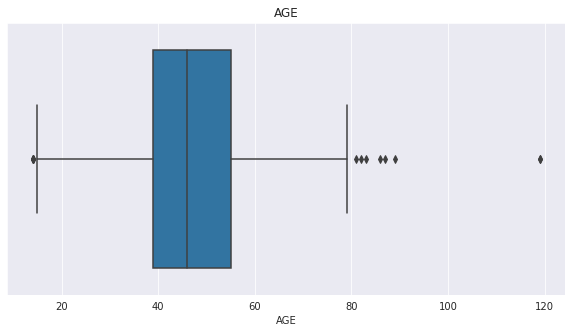

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


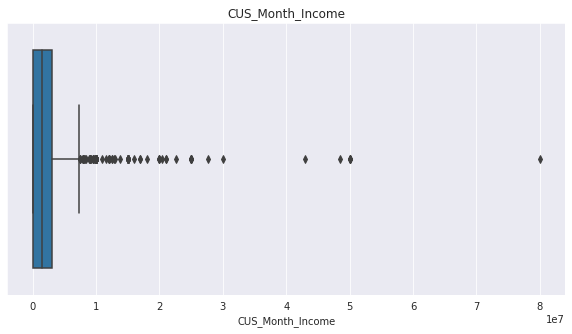

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


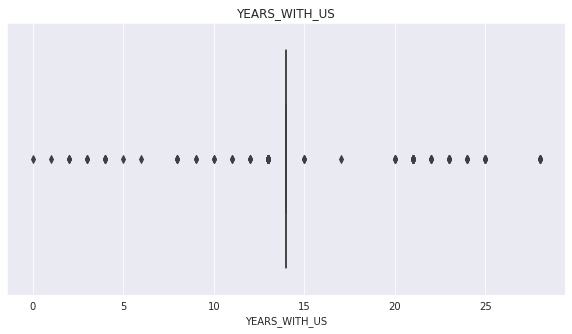

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


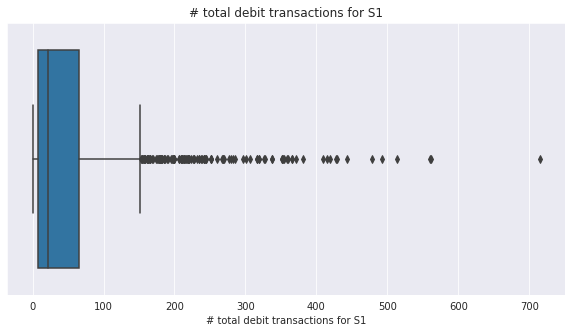

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


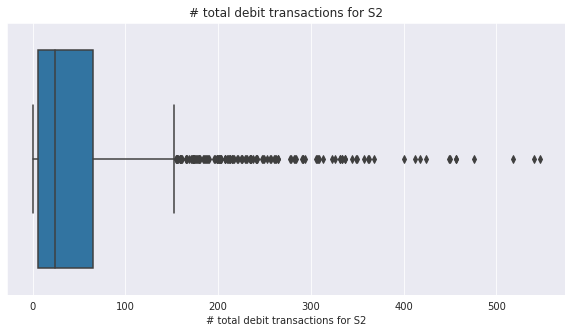

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


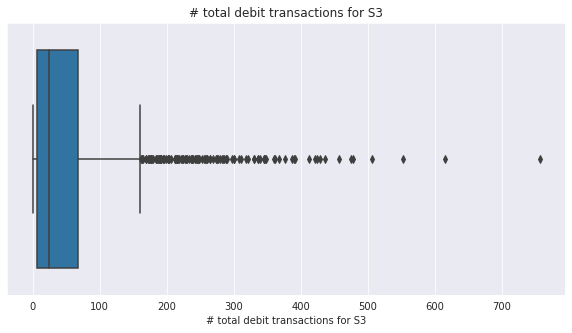

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


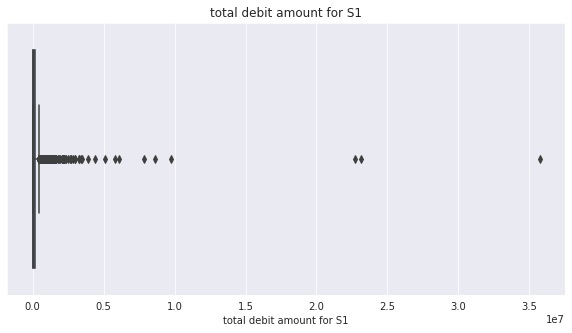

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


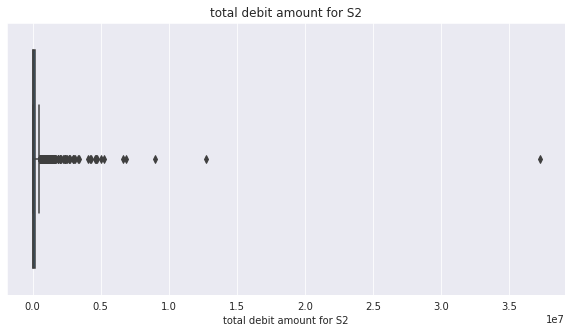

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


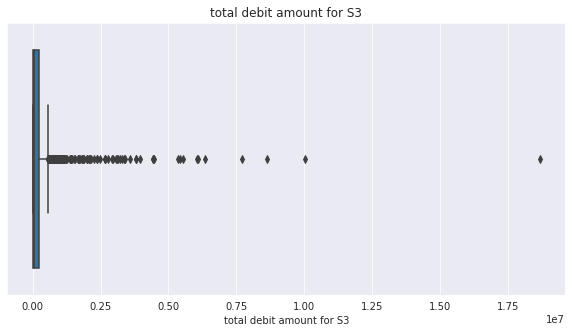

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


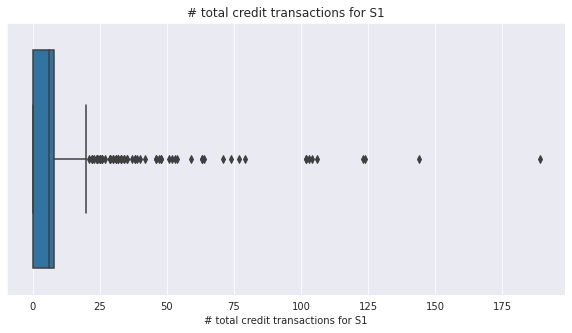

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


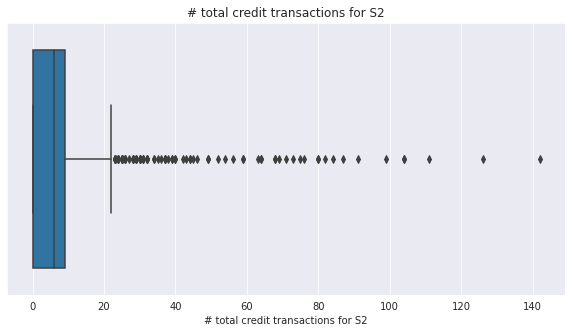

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


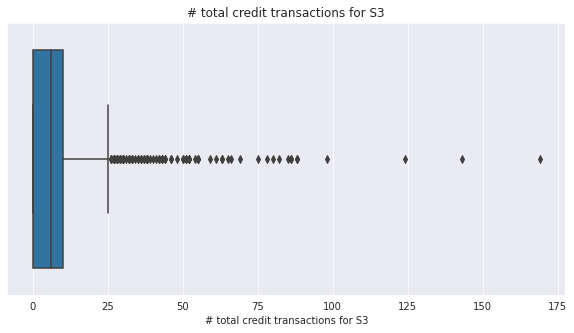

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


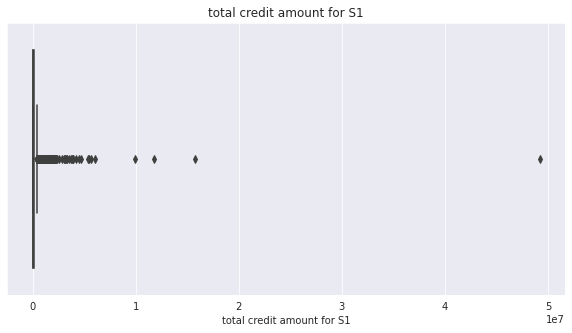

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


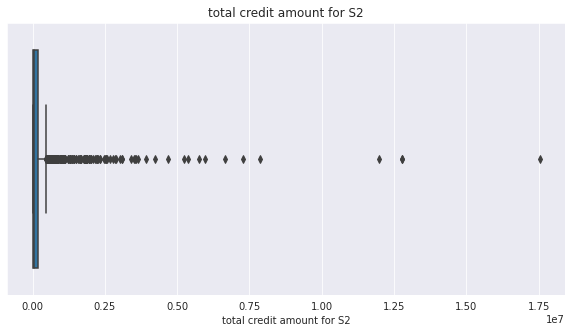

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


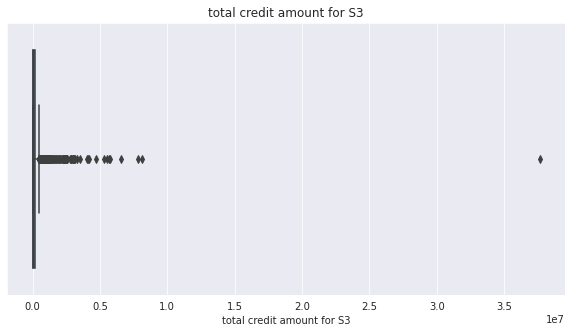

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


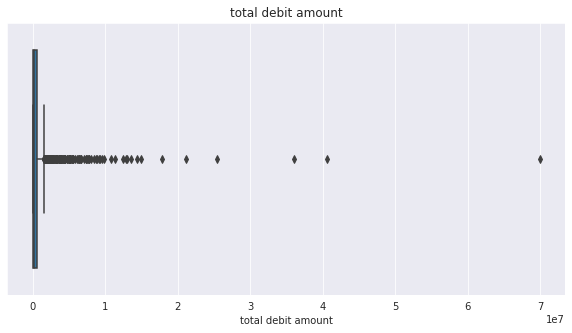

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


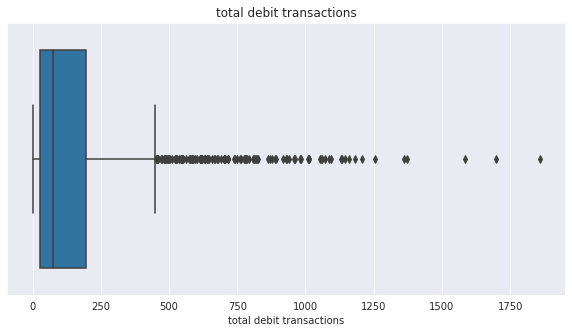

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


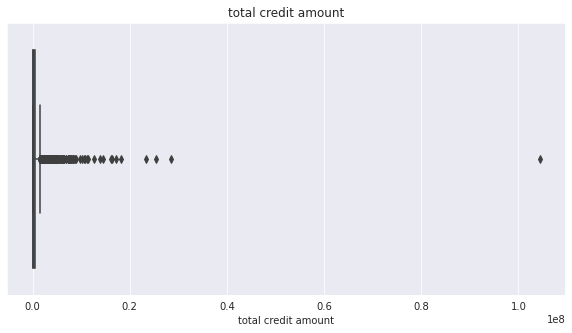

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


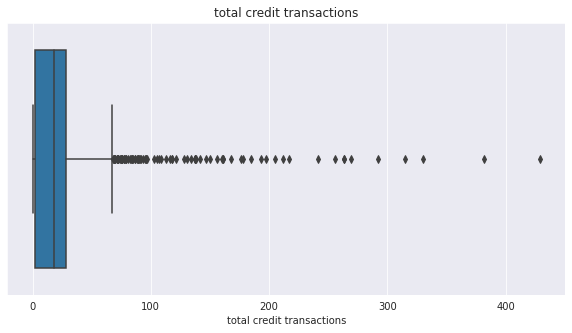

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


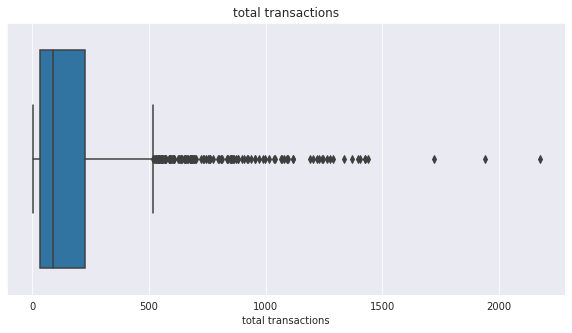

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


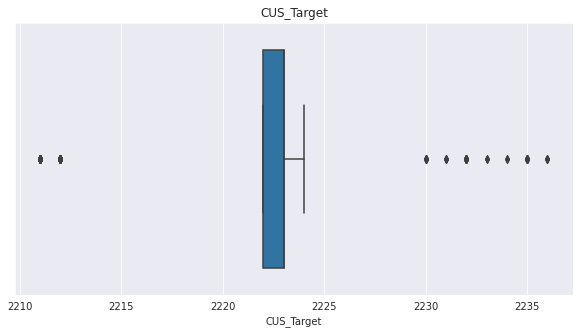

In [ ]:
# lets find the outliers
for col in df._get_numeric_data():
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [ ]:
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,1970-02-13,49,7116.64,1,1,1994-06-30,25,277,265,345,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,0,0
1,1973-09-20,46,1500000.00,0,4,2005-05-19,14,37,15,45,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,1,0
2,1966-07-18,53,5000000.00,0,4,2005-05-20,14,31,14,8,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,2,0
3,2004-01-09,15,500.00,0,4,2005-05-20,14,0,1,0,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,1,0
4,1971-03-07,48,9000000.00,0,4,2014-06-30,5,15,33,12,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,1,0


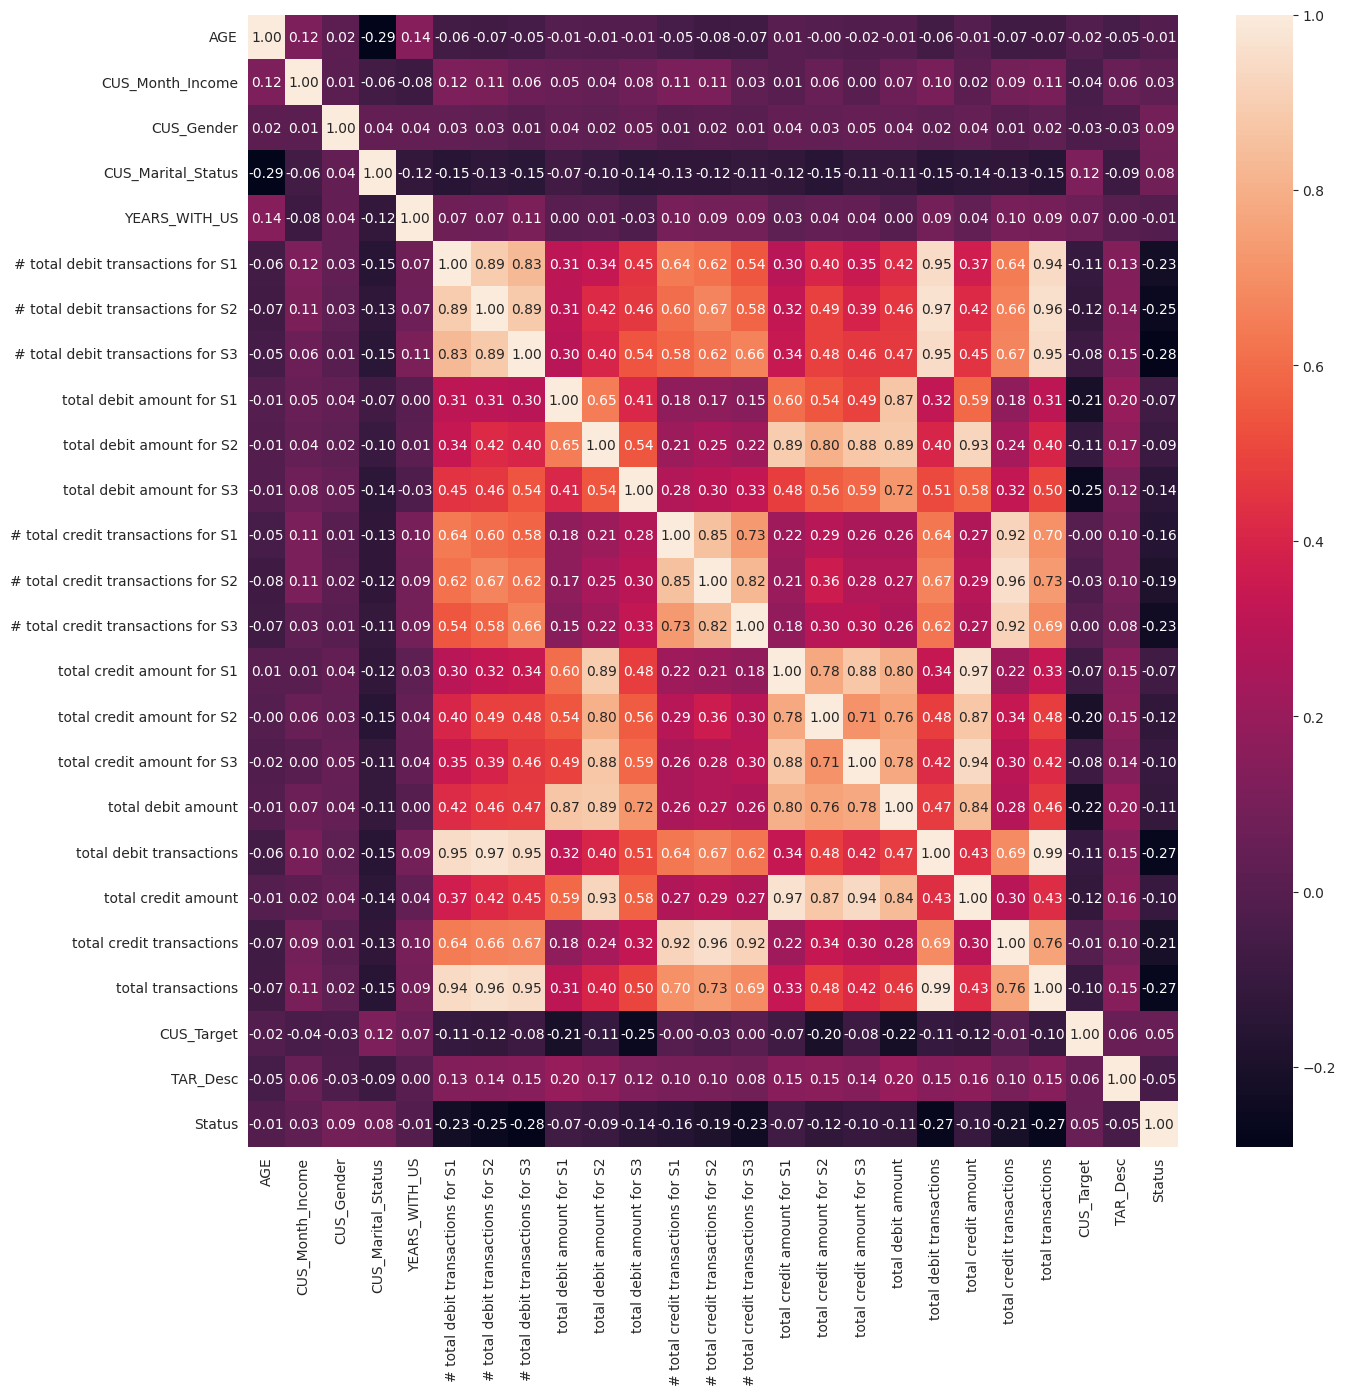

In [ ]:
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
df.drop(df.columns[7:19], axis=1, inplace=True)

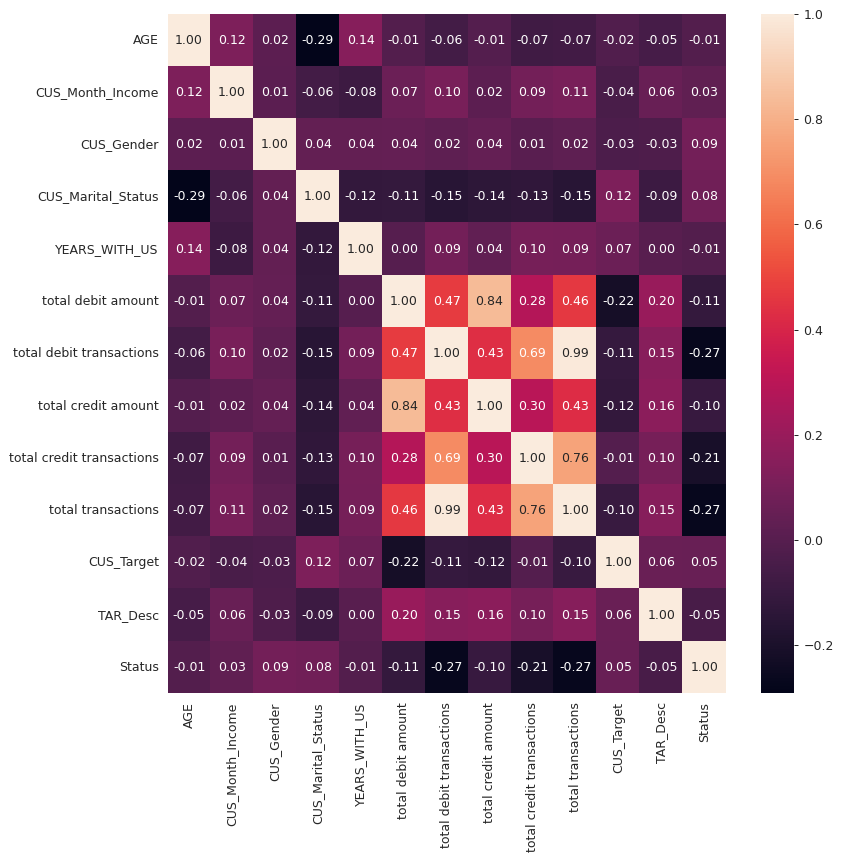

In [ ]:
plt.figure(figsize=(10,10),dpi=90)
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

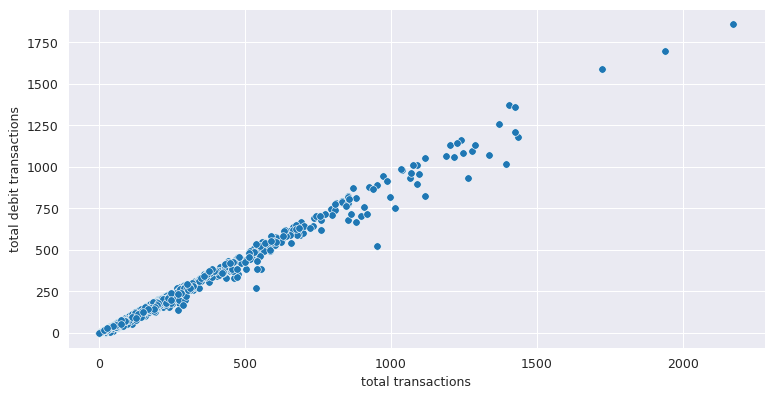

In [ ]:
plt.figure(figsize=(10,5), dpi=90)
sns.scatterplot(data=df, x="total transactions", y="total debit transactions")
plt.show()

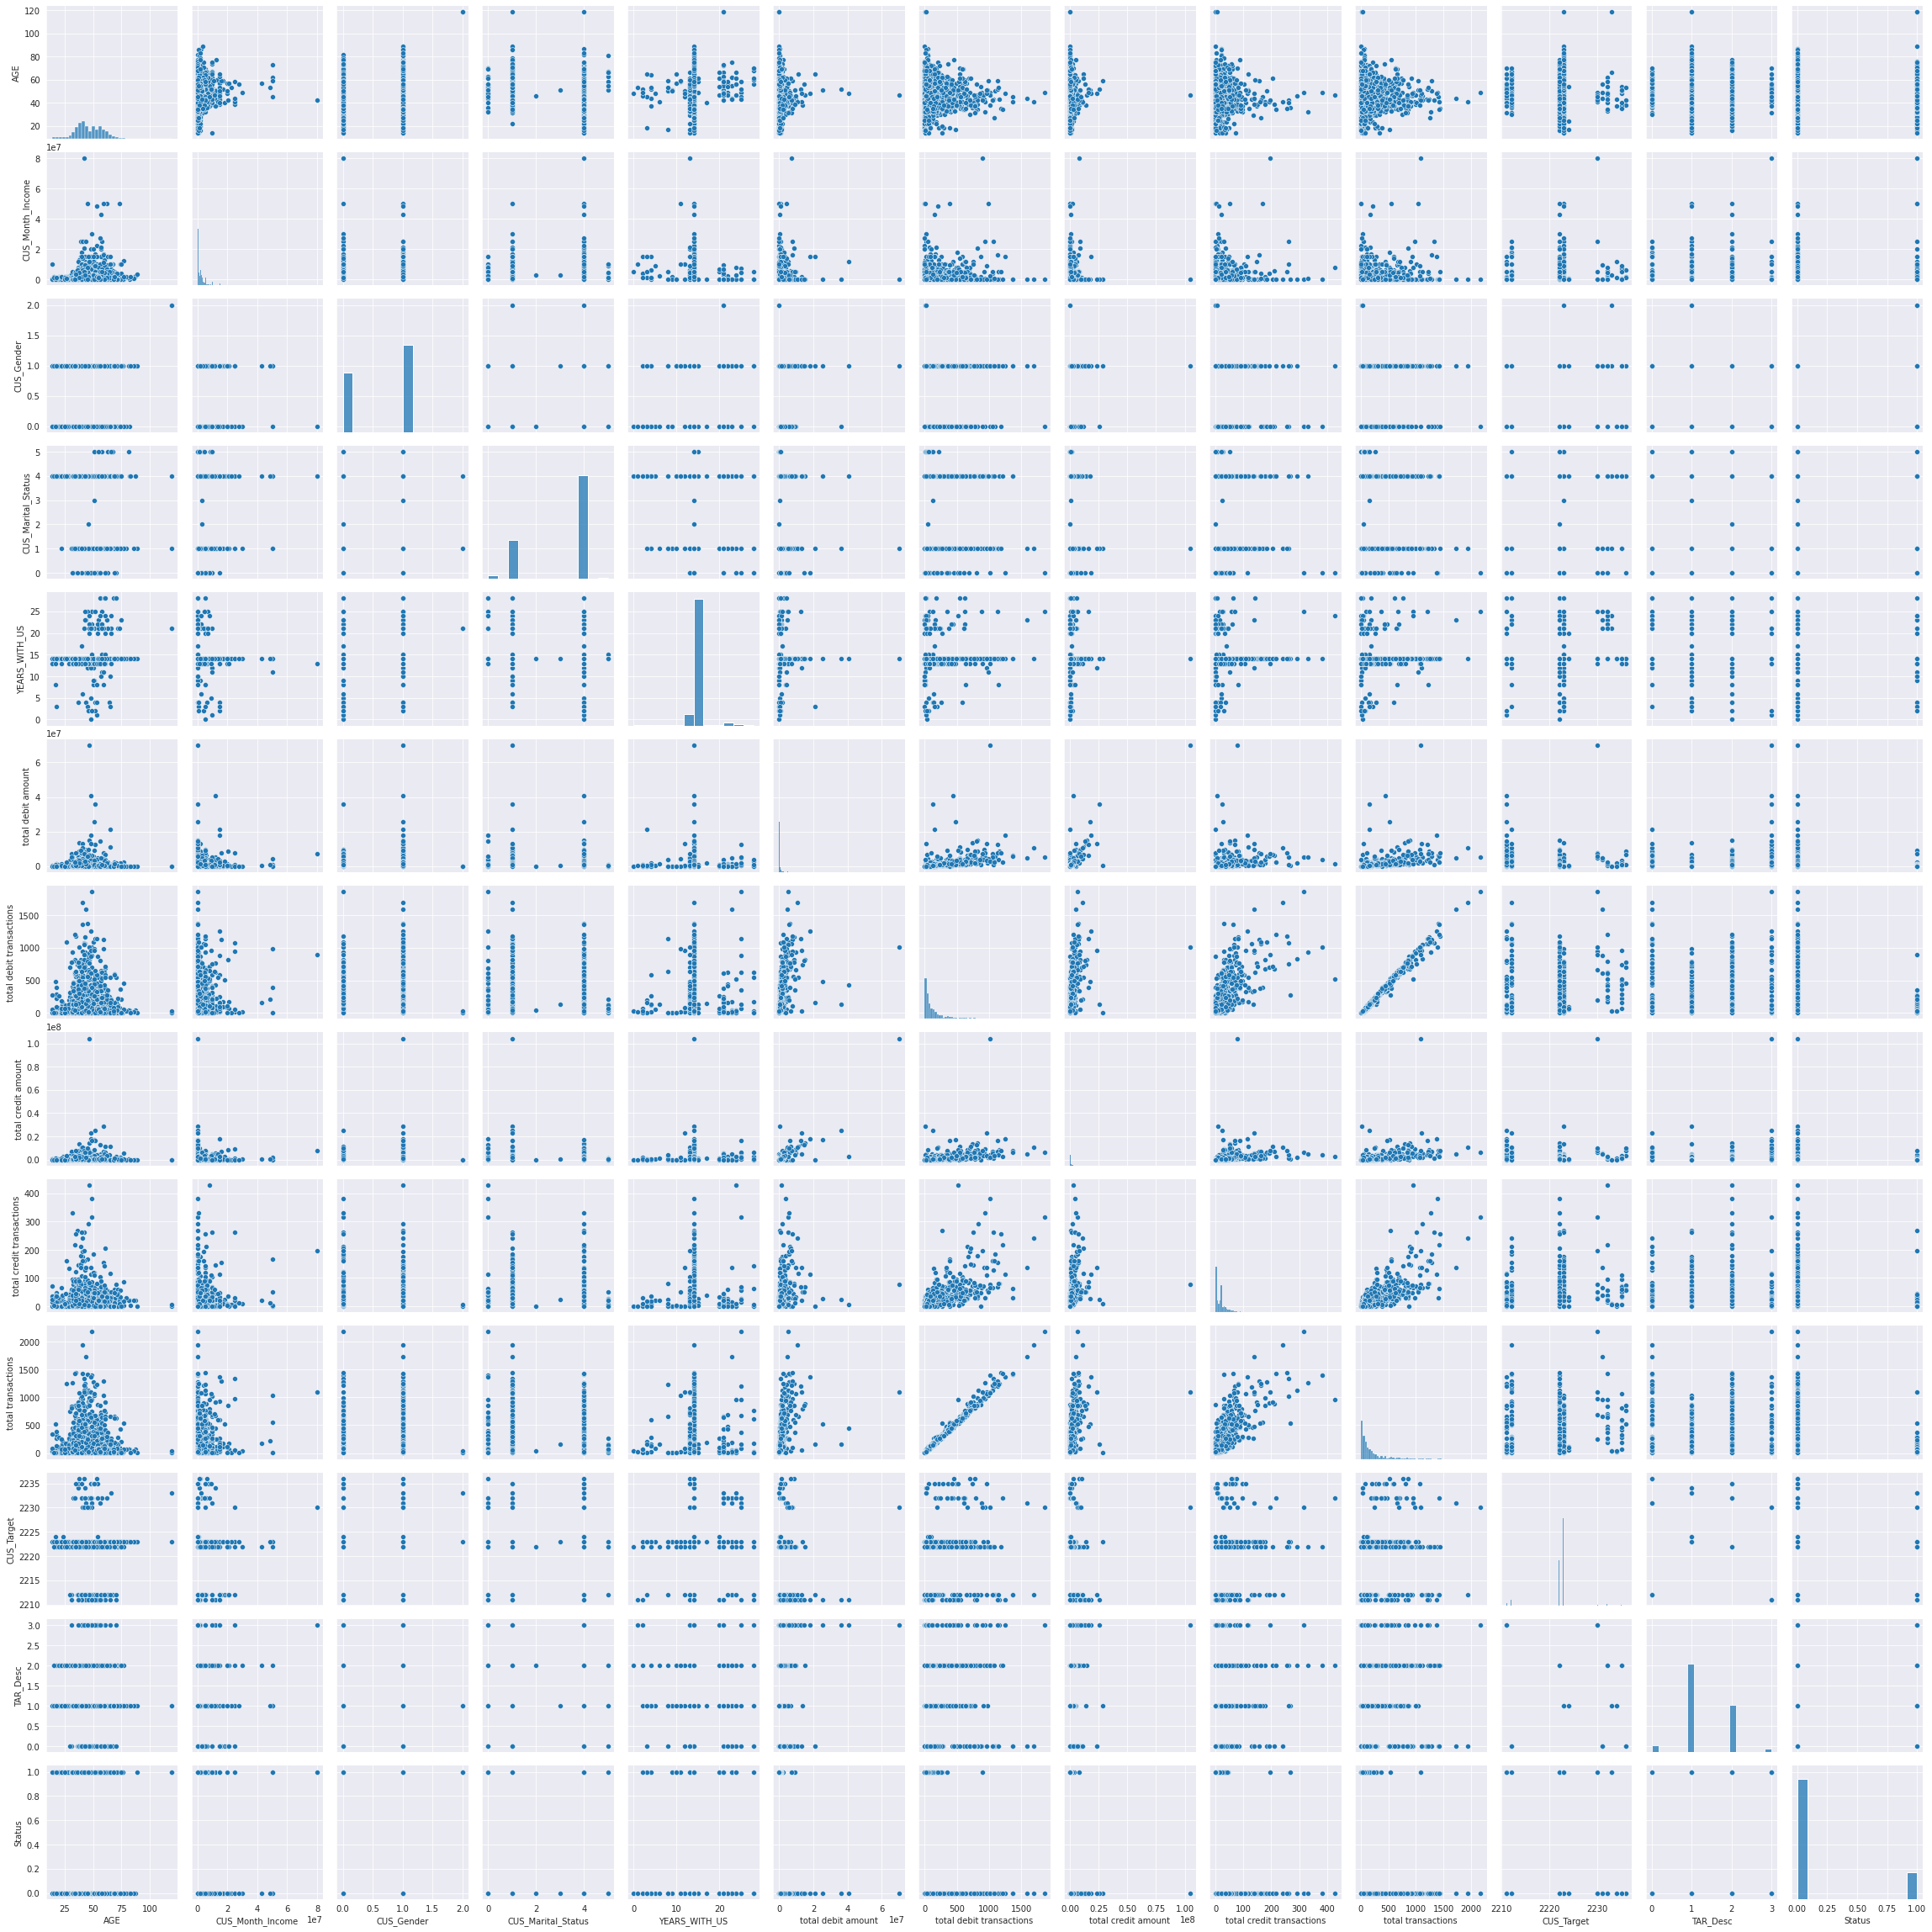

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,1970-02-13,49,7116.64,1,1,1994-06-30,25,4758311.63,887,5659653.33,65,952,2231,0,0
1,1973-09-20,46,1500000.00,0,4,2005-05-19,14,139363.22,97,87000.00,10,107,2223,1,0
2,1966-07-18,53,5000000.00,0,4,2005-05-20,14,37375.46,53,1020883.70,27,80,2222,2,0
3,2004-01-09,15,500.00,0,4,2005-05-20,14,4000.00,1,76946.96,12,13,2223,1,0
4,1971-03-07,48,9000000.00,0,4,2014-06-30,5,338470.29,60,442100.00,21,81,2223,1,0


In [ ]:
df["YEARS_WITH_US"].max()

28

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 4) for i in range(0, 28, 4)]

df["tenure_group"] = pd.cut(df.YEARS_WITH_US, range(1, 30, 4), right=False, labels=labels)

In [ ]:
df["tenure_group"].value_counts()

12 - 16    1170
20 - 24      33
24 - 28      13
0 - 4        12
8 - 12        9
4 - 8         6
16 - 20       5
Name: tenure_group, dtype: int64

In [ ]:
df.drop("total transactions", axis=1, inplace=True)

In [ ]:
df.drop(["CUS_DOB","CUS_Customer_Since","YEARS_WITH_US"], axis=1, inplace=True)
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status,tenure_group
0,49,7116.64,1,1,4758311.63,887,5659653.33,65,952,2231,0,0,24 - 28
1,46,1500000.00,0,4,139363.22,97,87000.00,10,107,2223,1,0,12 - 16
2,53,5000000.00,0,4,37375.46,53,1020883.70,27,80,2222,2,0,12 - 16
3,15,500.00,0,4,4000.00,1,76946.96,12,13,2223,1,0,12 - 16
4,48,9000000.00,0,4,338470.29,60,442100.00,21,81,2223,1,0,4 - 8


In [ ]:
df["tenure_group"] = lbe.fit_transform(df["tenure_group"])
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,tenure_group
0,49,7116.64,1,1,4758311.63,887,5659653.33,65,2231,0,0,4
1,46,1500000.00,0,4,139363.22,97,87000.00,10,2223,1,0,1
2,53,5000000.00,0,4,37375.46,53,1020883.70,27,2222,2,0,1
3,15,500.00,0,4,4000.00,1,76946.96,12,2223,1,0,1
4,48,9000000.00,0,4,338470.29,60,442100.00,21,2223,1,0,5


In [ ]:
scale_me = ["CUS_Month_Income","total debit amount","total credit amount", "CUS_Target"]

In [ ]:
x = df.drop("Status", axis=1)
y = df["Status"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [ ]:
scaler.transform(x)

array([[3.33333333e-01, 8.89580000e-05, 5.00000000e-01, ...,
        8.00000000e-01, 0.00000000e+00, 5.71428571e-01],
       [3.04761905e-01, 1.87500000e-02, 0.00000000e+00, ...,
        4.80000000e-01, 3.33333333e-01, 1.42857143e-01],
       [3.71428571e-01, 6.25000000e-02, 0.00000000e+00, ...,
        4.40000000e-01, 6.66666667e-01, 1.42857143e-01],
       ...,
       [1.90476190e-01, 1.25000000e-05, 5.00000000e-01, ...,
        8.40000000e-01, 6.66666667e-01, 1.42857143e-01],
       [5.23809524e-01, 2.50000000e-02, 5.00000000e-01, ...,
        4.40000000e-01, 6.66666667e-01, 1.42857143e-01],
       [4.19047619e-01, 6.25000000e-02, 0.00000000e+00, ...,
        4.40000000e-01, 6.66666667e-01, 1.42857143e-01]])

In [ ]:
x.ffill(inplace=True)

In [ ]:
print(y.shape)
print(x.shape)

(1249,)
(1249, 11)


In [ ]:
# splitting into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10, stratify=y)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(999, 11)
(250, 11)
(999,)
(250,)


In [ ]:
# model building 
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print(logis.score(x_train, y_train))
print(logis.score(x_test, y_test))

0.8198198198198198
0.82


In [ ]:
y_pred = logis.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       205
           1       0.00      0.00      0.00        45

    accuracy                           0.82       250
   macro avg       0.41      0.50      0.45       250
weighted avg       0.67      0.82      0.74       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df.columns

Index(['CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')